In [27]:
import cantera as ct
import math
import numpy as np
import matplotlib.pyplot as plt
from ThermoPropertiesNASA import thermo

In [28]:
gas = ct.Solution('Jerzembeck.yaml')
T_Adiabatic = []
C_O = []
C_CO = []
C_CO2 = []
C_H2 = []
C_H20 = []
C_H = []
C_OH = []
C_NO = []

[1511.3396861837196]
[1511.3396861837196, 1609.6881668869598]
[1511.3396861837196, 1609.6881668869598, 1704.8239735858508]
[1511.3396861837196, 1609.6881668869598, 1704.8239735858508, 1796.71843994797]
[1511.3396861837196, 1609.6881668869598, 1704.8239735858508, 1796.71843994797, 1885.166940866878]
[1511.3396861837196, 1609.6881668869598, 1704.8239735858508, 1796.71843994797, 1885.166940866878, 1969.6778377065061]
[1511.3396861837196, 1609.6881668869598, 1704.8239735858508, 1796.71843994797, 1885.166940866878, 1969.6778377065061, 2049.3145101488285]
[1511.3396861837196, 1609.6881668869598, 1704.8239735858508, 1796.71843994797, 1885.166940866878, 1969.6778377065061, 2049.3145101488285, 2122.5012364146933]
[1511.3396861837196, 1609.6881668869598, 1704.8239735858508, 1796.71843994797, 1885.166940866878, 1969.6778377065061, 2049.3145101488285, 2122.5012364146933, 2186.819288873598]
[1511.3396861837196, 1609.6881668869598, 1704.8239735858508, 1796.71843994797, 1885.166940866878, 1969.677837

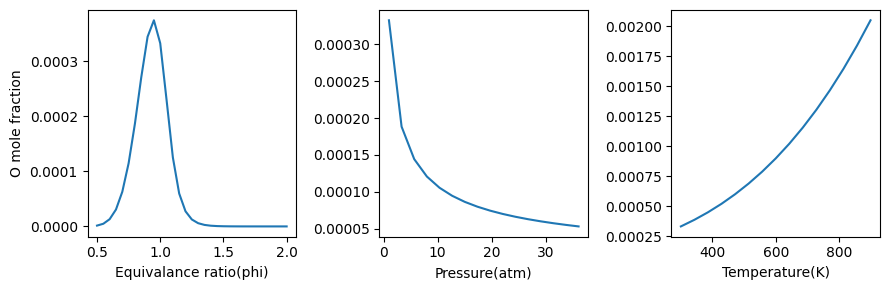

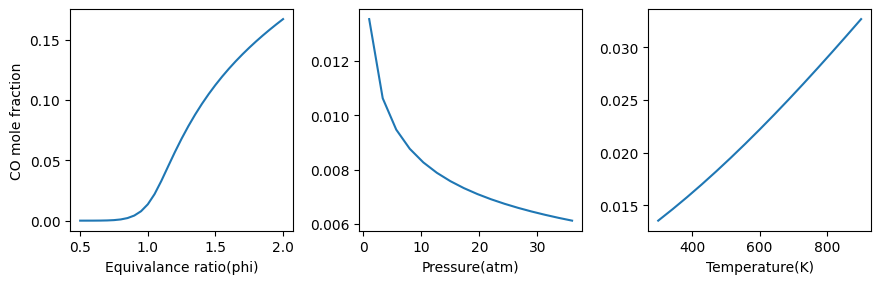

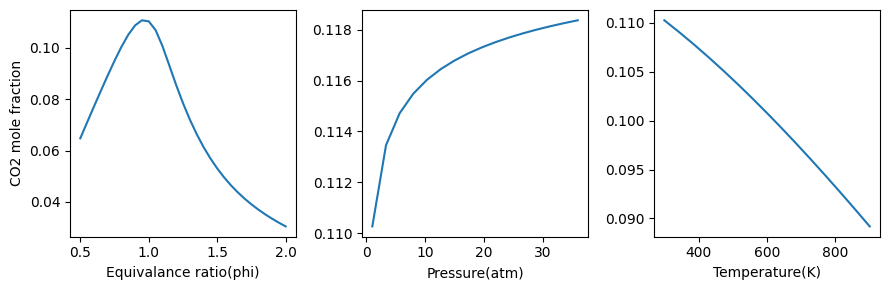

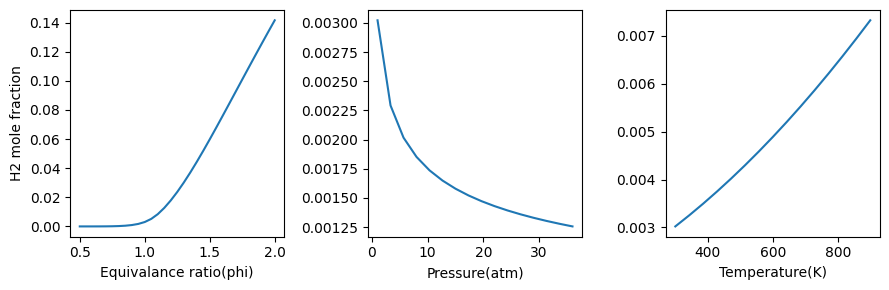

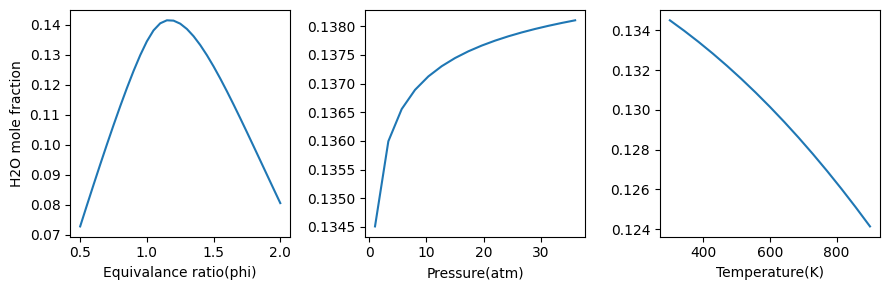

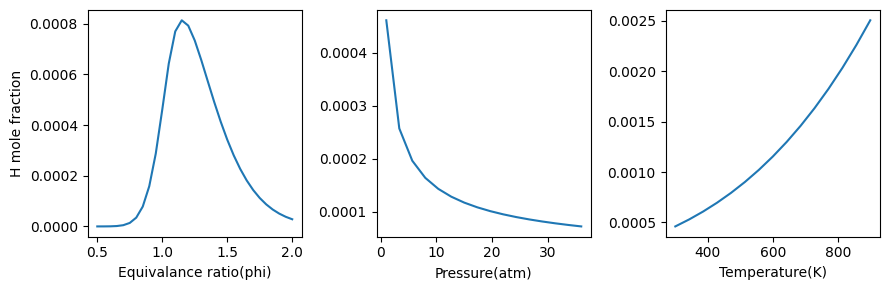

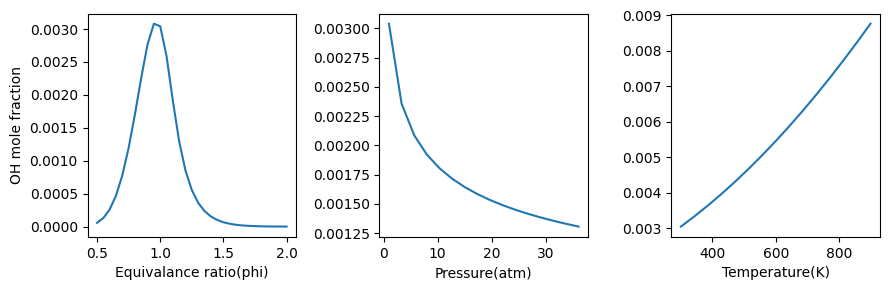

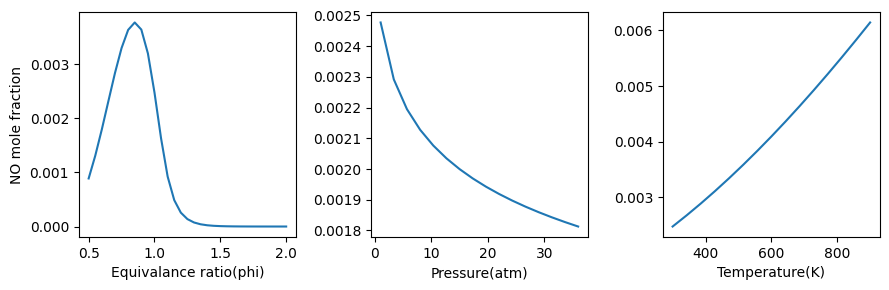

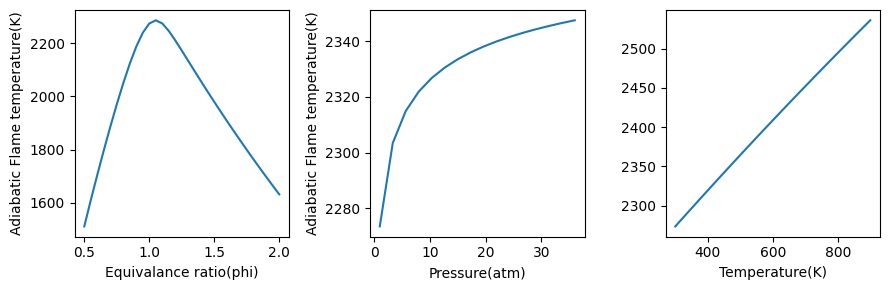

In [29]:
phis = np.linspace(0.5,2,31)
pressures = np.linspace(1,36,16)
temperature = np.linspace(300,900,15)
species = ['O','CO','CO2','H2','H2O','H','OH','NO']

for specie in species :
    lis_phi =[]
    lis_pressure =[]
    lis_temp =[]
    list_temperature_phi =[]
    list_temperature_pressure =[]
    list_temperature_temp =[] 
    for phi in phis:
        X_O2= 12.5/phi
        X_N2= 47/phi
        reactants = {'IXC8H18':1,'O2':X_O2,'N2':X_N2}
        gas.TPX = 300, ct.one_atm,reactants
        gas.equilibrate('HP')
        lis_phi.append(gas[specie].X)
        list_temperature_phi.append(gas.T)
        print(list_temperature_phi)
    
    for temperature in temperatures:
        phi= 1.0
        X_O2= 12.5/phi
        X_N2= 47/phi
        reactants = {'IXC8H18':1,'O2':X_O2,'N2':X_N2}
        gas.TPX = temperature,ct.one_atm,reactants
        gas.equilibrate('HP')
        lis_temp.append(gas[specie].X)
        list_temperature_temp.append(gas.T)
        print(list_temperature_temp)
    
    for pressure in pressures:
        phi=1.0
        X_O2= 12.5/phi
        X_N2= 47/phi
        reactants = {'IXC8H18':1,'O2':X_O2,'N2':X_N2}
        gas.TPX = 300,pressure*ct.one_atm,reactants
        gas.equilibrate('HP')
        lis_pressure.append(gas[specie].X)
        list_temperature_pressure.append([gas.T])
        print(list_temperature_pressure)
    

    plt.figure(figsize=(9,3))
    plt.subplot(131)
    plt.plot(phis,lis_phi)
    plt.ylabel('%s mole fraction'%(specie))
    # if specie == 'NO':
    plt.xlabel('Equivalance ratio(phi)')
    plt.subplot(132)
    plt.plot(pressures,lis_pressure)
    # if specie == 'NO' :
    plt.xlabel('Pressure(atm)')
    plt.subplot(133)
    plt.plot(temperatures,lis_temp)
    # if specie == 'NO':
    plt.xlabel('Temperature(K)')
    plt.tight_layout()
    
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.plot(phis,list_temperature_phi)
plt.ylabel('Adiabatic Flame temperature(K)')
plt.xlabel('Equivalance ratio(phi)')
plt.subplot(132)
plt.plot(pressures,list_temperature_pressure)
plt.xlabel('Pressure(atm)')
plt.ylabel('Adiabatic Flame temperature(K)')
plt.subplot(133)
plt.plot(temperatures,list_temperature_temp)
plt.xlabel('Temperature(K)')

plt.tight_layout()



